| <div align="left"> <a href="https://github.com/marashot96/Credit-Products-Analysis/blob/main/notebooks/Navigator.md">🔙 Назад к Jupyter-notebooks </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Мое полное портфолио </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/Credit-Products-Analysis?tab=readme-ov-file#-czech-bank-project--">🔙 Назад к описанию проекта </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |

# <div align="center"> Исследовательский анализ данных </div>

## Цель
- Провести предварительное исследование данных Czech Bank Dataset, чтобы:
- Оценить качество и полноту данных; 
- Понять распределение клиентов по районам и возрастам;
- Найти связи между клиентами, счетами, транзакциями и кредитами.

## Блок 1: Загрузка библиотек и данных
**Примечание:** *Все даты представлены в виде чисел — это количество дней с некоторой неназванной даты. Поэтому для анализа будем использовать относительные сравнения и дельты.*


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_palette('Set2')

client = pd.read_csv('client.csv', sep=';')
district = pd.read_csv('district.csv', sep=';')
account = pd.read_csv('account.csv', sep=';')
disp = pd.read_csv('disp.csv', sep=';')
card = pd.read_csv('card.csv', sep=';')
loan = pd.read_csv('loan.csv', sep=';')
order = pd.read_csv('order.csv', sep=';')
trans = pd.read_csv('trans.csv', sep=';')

for name, df in zip(['client', 'district', 'account', 'disp', 'card', 'loan', 'order', 'trans'],
                    [client, district, account, disp, card, loan, order, trans]):
    print(f"\n{name.upper()} — shape: {df.shape}")
    display(df.head(2))


CLIENT — shape: (5369, 3)


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1



DISTRICT — shape: (77, 16)


,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674



ACCOUNT — shape: (4500, 4)


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101



DISP — shape: (5369, 4)


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER



CARD — shape: (892, 4)


,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00



LOAN — shape: (682, 7)


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A



ORDER — shape: (6471, 6)


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER



TRANS — shape: (1056320, 10)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN


## Блок 2: Преобразование возраста клиентов и распределение по возрастам

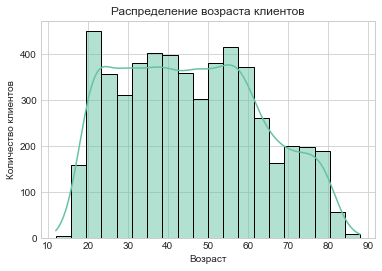

In [7]:
# birth_number имеет формат YYMMDD + пол, если > 50
def decode_birth(bn):
    year = bn // 10000
    month = (bn // 100) % 100
    day = bn % 100
    if month > 50:
        month -= 50  # Женщины
    return year + 1900  # Датасет старый, предполагаем до 2000 года

client['birth_year'] = client['birth_number'].apply(lambda x: decode_birth(x))
client['age'] = client['birth_year'].apply(lambda x: 1999 - x)  # условный "текущий" год

sns.histplot(client['age'], bins=20, kde=True)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

## Блок 3: Количество клиентов по районам

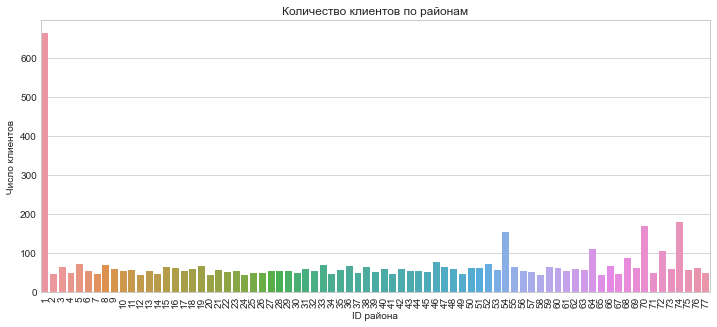

In [8]:
clients_by_district = client['district_id'].value_counts().sort_index()
districts = district.set_index('district_id')

plt.figure(figsize=(12, 5))
sns.barplot(x=clients_by_district.index.astype(str),
            y=clients_by_district.values)
plt.title('Количество клиентов по районам')
plt.xlabel('ID района')
plt.ylabel('Число клиентов')
plt.xticks(rotation=90)
plt.show()

## Блок 4: Кол-во кредитов, сумма и просрочки и распределение сумм кредитов

Всего кредитов: 682
Просроченных (default): 31
Процент дефолтов: 4.55%


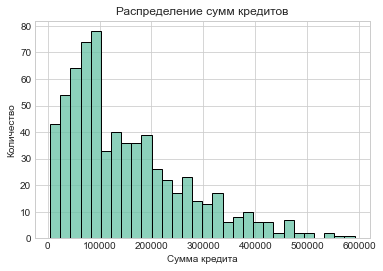

In [9]:
loan['default'] = loan['status'].apply(lambda x: 1 if x == 'B' else 0)

print("Всего кредитов:", loan.shape[0])
print("Просроченных (default):", loan['default'].sum())
print("Процент дефолтов: {:.2f}%".format(loan['default'].mean() * 100))

sns.histplot(loan['amount'], bins=30)
plt.title('Распределение сумм кредитов')
plt.xlabel('Сумма кредита')
plt.ylabel('Количество')
plt.show()

---

## 💼 Контактная информация
Если вы хотите обсудить различные задачи, запросы или проекты, предложить кейс или сотрудничество — обязательно напишите мне!

- 📫 [t.me/marashot96](https://t.me/marashot96)
- 🌐 [marashot96@ya.ru](mailto:marashot96@ya.ru)

| <div align="left"> <a href="https://github.com/marashot96/Credit-Products-Analysis/blob/main/notebooks/Navigator.md">🔙 Назад к Jupyter-notebooks </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Мое полное портфолио </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/Credit-Products-Analysis?tab=readme-ov-file#-czech-bank-project--">🔙 Назад к описанию проекта </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |